In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [2]:
import os
os.getcwd()

'C:\\Users\\Hp\\hafsa-portfolio\\project_02_price_app'

In [3]:
#loading train dataset
df = pd.read_csv("data/train (4).csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### STAGE 1 - Structural Exploratory Data Analysis (EDA)
The next few cells below focus on structural EDA

In [4]:
df.shape

(1460, 81)

In [5]:
target = "SalePrice"

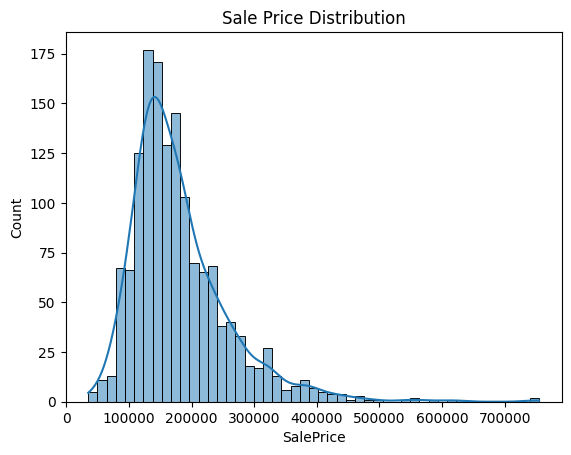

In [6]:
sns.histplot(df[target], kde=True)
plt.title("Sale Price Distribution")
plt.show()

In [7]:
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

In [8]:
missing / len(df) * 100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [9]:
corr = df.select_dtypes(include=np.number).corr()
top_corr = corr[target].sort_values(ascending=False)

top_corr.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

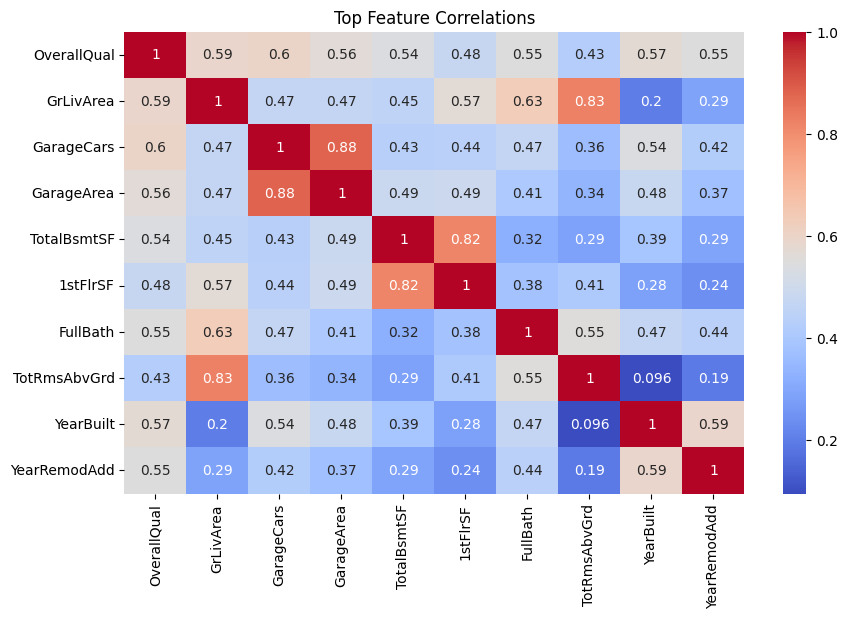

In [10]:
top_features = top_corr.index[1:11]

plt.figure(figsize=(10, 6))
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Top Feature Correlations")
plt.show()

In [11]:
pd.set_option('display.max_rows', None)
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [12]:
"""The Id column was removed from train set as it is a unique identifier and does not contain 
predictive information. Keeping identifiers can harm model generalization."""
#df = df.drop(columns=['Id'], axis = 0)

'The Id column was removed from train set as it is a unique identifier and does not contain \npredictive information. Keeping identifiers can harm model generalization.'

In [13]:
pd.reset_option('display.max_rows')

In [14]:
# separating column types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

len(numeric_cols), len(categorical_cols)

(38, 43)

In [15]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
df = df.drop(columns=cols_to_drop)
df.shape

(1460, 75)

Columns with extremely high missing values (>50%) were dropped: PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu. These columns would require excessive imputation and provide limited predictive value.

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [17]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

MSZoning: 5 unique values
Street: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinType2: 6 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 5 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
GarageType: 6 unique values
GarageFinish: 3 unique values
GarageQual: 5 unique values
GarageCond: 5 unique values
PavedDrive: 3 unique values
SaleType: 9 unique values
Sal

In [18]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols].nunique().sort_values()

Street            2
Utilities         2
CentralAir        2
LandSlope         3
GarageFinish      3
PavedDrive        3
LandContour       4
ExterQual         4
BsmtQual          4
BsmtCond          4
KitchenQual       4
BsmtExposure      4
LotShape          4
ExterCond         5
LotConfig         5
MSZoning          5
Electrical        5
HeatingQC         5
GarageQual        5
BldgType          5
GarageCond        5
BsmtFinType2      6
Foundation        6
BsmtFinType1      6
SaleCondition     6
Heating           6
GarageType        6
RoofStyle         6
Functional        7
Condition2        8
RoofMatl          8
HouseStyle        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [19]:
# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Missing values in categorical columns
cat_missing = df[cat_cols].isnull().sum().sort_values(ascending=False)
cat_missing_pct = (cat_missing / len(df) * 100).round(2)

# Combine count and percentage in a DataFrame
missing_cat_df = pd.DataFrame({'MissingCount': cat_missing, 'MissingPercent': cat_missing_pct})
missing_cat_df

,MissingCount,MissingPercent
GarageType,81,5.55
GarageCond,81,5.55
GarageQual,81,5.55
GarageFinish,81,5.55
BsmtFinType2,38,2.60
BsmtExposure,38,2.60
BsmtFinType1,37,2.53
BsmtCond,37,2.53
BsmtQual,37,2.53
Electrical,1,0.07


In [20]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")

--- MSZoning ---
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


--- Street ---
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


--- LotShape ---
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


--- LandContour ---
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


--- Utilities ---
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


--- LotConfig ---
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


--- LandSlope ---
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


--- Neighborhood ---
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR     

In [21]:
#loading test dataset
df_test = pd.read_csv("data/test (4).csv")

In [22]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [23]:
df_test.shape

(1459, 80)

In [24]:
test_missing = (
    df_test.isnull()
        .sum()
        .to_frame("MissingCount")
        .assign(MissingPercent=lambda x: x.MissingCount / len(df_test) * 100)
        .query("MissingCount > 0")
        .sort_values("MissingCount", ascending=False)
)

test_missing


,MissingCount,MissingPercent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
MasVnrType,894,61.274846
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageQual,78,5.346127
GarageCond,78,5.346127
GarageYrBlt,78,5.346127


In [25]:
cols_dropped = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

In [26]:
df_test = df_test.drop(columns=cols_dropped, errors="ignore")

df_test.shape


(1459, 74)

In [27]:
df_test = df_test.drop("Id", axis=1)

In [28]:
# separate target from train
X_train = df.drop("SalePrice", axis=1)
y_train = df["SalePrice"]

In [29]:
X_test = df_test.copy()

In [30]:
set(X_train.columns) == set(X_test.columns)

False

In [31]:
X_train.to_csv("X_train_base.csv", index=False)
X_test.to_csv("X_test_base.csv", index=False)
y_train.to_csv("y_train.csv", index=False)

### STAGE 2 — DATA CLEANING

In [32]:
low_variance_cols = ["Utilities", "Street"]

df.drop(columns=low_variance_cols, inplace=True)
df_test.drop(columns=low_variance_cols, inplace=True)

Removed near-constant features
These add noise, not prediction power

In [33]:
rare_numeric_cols = ["PoolArea", "MiscVal", "3SsnPorch"]

df.drop(columns=rare_numeric_cols, inplace=True)
df_test.drop(columns=rare_numeric_cols, inplace=True)

Removed sparse numeric features
These distort distributions & hurt models
Safe to drop for baseline modeling

In [34]:
# Basement related
bsmt_cols = [
    "BsmtQual", "BsmtCond", "BsmtExposure",
    "BsmtFinType1", "BsmtFinType2"
]

df[bsmt_cols].isnull().sum(), df_test[bsmt_cols].isnull().sum()

(BsmtQual        37
 BsmtCond        37
 BsmtExposure    38
 BsmtFinType1    37
 BsmtFinType2    38
 dtype: int64,
 BsmtQual        44
 BsmtCond        45
 BsmtExposure    44
 BsmtFinType1    42
 BsmtFinType2    42
 dtype: int64)

In [35]:
# Garage related
garage_cols = [
    "GarageType", "GarageFinish",
    "GarageQual", "GarageCond"
]

df[garage_cols].isnull().sum(), df_test[garage_cols].isnull().sum()

(GarageType      81
 GarageFinish    81
 GarageQual      81
 GarageCond      81
 dtype: int64,
 GarageType      76
 GarageFinish    78
 GarageQual      78
 GarageCond      78
 dtype: int64)

In [36]:
high_noise_cols = ["Condition2", "RoofMatl"]

df.drop(columns=high_noise_cols, inplace=True)
df_test.drop(columns=high_noise_cols, inplace=True)

Removed imbalanced categorical noise
Reduces overfitting risk
Improves model stability

In [37]:
df.shape, df_test.shape

((1460, 68), (1459, 66))

### STAGE 3 — MISSING VALUE HANDLING

In [38]:
# Basement
bsmt_cols = [
    "BsmtQual", "BsmtCond", "BsmtExposure",
    "BsmtFinType1", "BsmtFinType2"
]

df[bsmt_cols] = df[bsmt_cols].fillna("None")
df_test[bsmt_cols] = df_test[bsmt_cols].fillna("None")


# Garage
garage_cols = [
    "GarageType", "GarageFinish",
    "GarageQual", "GarageCond"
]

df[garage_cols] = df[garage_cols].fillna("None")
df_test[garage_cols] = df_test[garage_cols].fillna("None")

Preserved real-world meaning
No information loss
Safe for encoding later

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df_test["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)

df["MasVnrArea"].fillna(0, inplace=True)
df_test["MasVnrArea"].fillna(0, inplace=True)

df["GarageYrBlt"].fillna(0, inplace=True)
df_test["GarageYrBlt"].fillna(0, inplace=True)

Median avoids outlier distortion
0 carries semantic meaning
Train/test consistency preserved

In [41]:
df.isnull().sum().sort_values(ascending=False).head()
df_test.isnull().sum().sort_values(ascending=False).head()

MSZoning        4
BsmtHalfBath    2
BsmtFullBath    2
Functional      2
KitchenQual     1
dtype: int64

In [42]:
df_test["MSZoning"].fillna(df["MSZoning"].mode()[0], inplace=True)

In [43]:
df_test["BsmtFullBath"].fillna(0, inplace=True)
df_test["BsmtHalfBath"].fillna(0, inplace=True)

In [44]:
df_test["Functional"].fillna("Typ", inplace=True)

In [45]:
df_test["KitchenQual"].fillna(df["KitchenQual"].mode()[0], inplace=True)

In [46]:
df_test.isnull().sum().sum()

np.int64(9)

In [47]:
df.isnull().sum().sort_values(ascending=False).head()
df_test.isnull().sum().sort_values(ascending=False).head()

BsmtFinSF2     1
Exterior1st    1
GarageCars     1
Exterior2nd    1
TotalBsmtSF    1
dtype: int64

In [48]:
df_test.isnull().sum().sort_values(ascending=False).head(10)

BsmtFinSF2     1
Exterior1st    1
GarageCars     1
Exterior2nd    1
TotalBsmtSF    1
BsmtUnfSF      1
BsmtFinSF1     1
GarageArea     1
SaleType       1
MSSubClass     0
dtype: int64

In [49]:
import warnings
warnings.filterwarnings("ignore")

# 1️⃣ Basement-related numeric features → fill with 0 (means no basement area)
bsmt_num_cols = [
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF"
]

df_test[bsmt_num_cols] = df_test[bsmt_num_cols].fillna(0)

# 2️⃣ Garage numeric features → fill with 0 (means no garage)
df_test["GarageCars"].fillna(0, inplace=True)
df_test["GarageArea"].fillna(0, inplace=True)

# 3️⃣ Exterior features → fill with mode (most common)
df_test["Exterior1st"].fillna(df_test["Exterior1st"].mode()[0], inplace=True)
df_test["Exterior2nd"].fillna(df_test["Exterior2nd"].mode()[0], inplace=True)

# 4️⃣ SaleType → fill with mode
df_test["SaleType"].fillna(df_test["SaleType"].mode()[0], inplace=True)

# 5️⃣ Final sanity check
df_test.isnull().sum().sum()

np.int64(0)

In [50]:
# Separate target
y = df["SalePrice"]
X = df.drop("SalePrice", axis=1)

# Combine train + test for encoding
combined = pd.concat([X, df_test], axis=0)

combined.shape

(2919, 67)

In [51]:
cat_cols = combined.select_dtypes(include="object").columns
num_cols = combined.select_dtypes(exclude="object").columns

len(cat_cols), len(num_cols)

(33, 34)

In [52]:
qual_map = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1
}

ordinal_cols = [
    "ExterQual", "ExterCond",
    "BsmtQual", "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "GarageQual", "GarageCond"
]

for col in ordinal_cols:
    combined[col] = combined[col].map(qual_map)

In [53]:
combined = pd.get_dummies(combined, columns=cat_cols, drop_first=True)

combined.shape

(2919, 216)

In [54]:
X_train = combined.iloc[:len(X), :]
X_test = combined.iloc[len(X):, :]

In [55]:
y_log = np.log1p(y)

In [56]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()

(np.int64(0), np.int64(1459))

In [57]:
X_train.shape, X_test.shape

((1460, 216), (1459, 216))

In [58]:
y_log.shape

(1460,)

### Model(s) Training

In [70]:
import numpy as np

y = np.log1p(df["SalePrice"])
X = df.drop("SalePrice", axis=1)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [88]:
# Convert all object columns to numeric using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_val   = pd.get_dummies(X_val, drop_first=True)

# Align columns of train and val sets (in case some dummies are missing in val)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

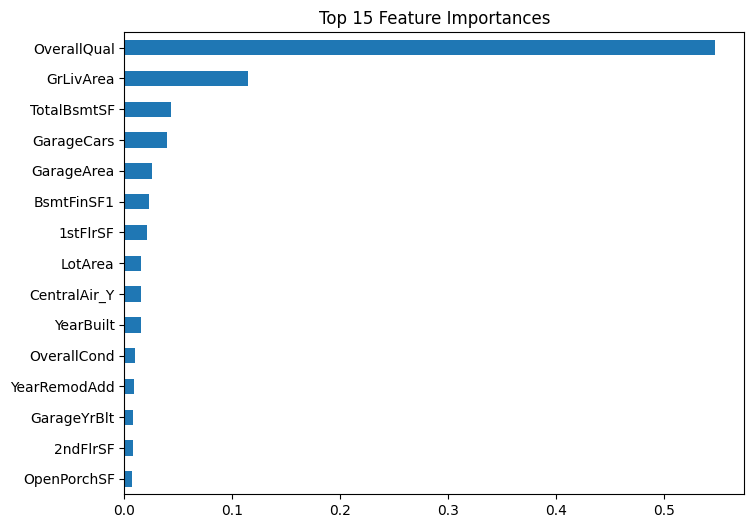

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importance.head(15).plot(kind='barh', figsize=(8,6))
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances")
plt.show()


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

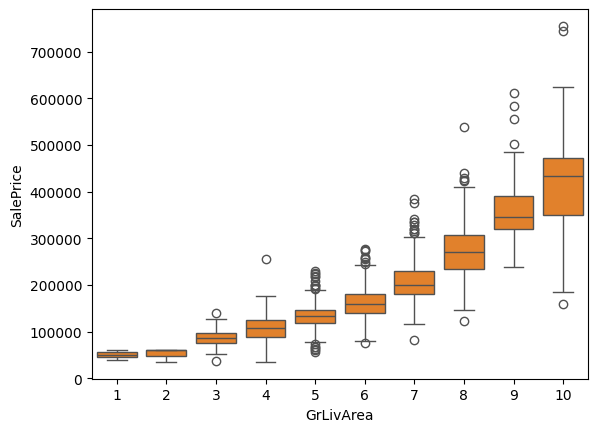

In [81]:
import seaborn as sns
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
sns.boxplot(x='OverallQual', y='SalePrice', data=df)


In [89]:
# Check shapes
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 219), (292, 219), (1168,), (292,))

In [90]:
# Make sure no object/string columns exist
X_train.select_dtypes(include="object").columns

Index([], dtype='object')

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [92]:
train_preds = rf.predict(X_train)
val_preds = rf.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

train_rmse, val_rmse

(np.float64(0.05323944937753695), np.float64(0.15051460077835382))

In [93]:
import pandas as pd

importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importance.head(10)

OverallQual     0.545560
GrLivArea       0.115001
TotalBsmtSF     0.042870
GarageCars      0.037710
GarageArea      0.026295
BsmtFinSF1      0.022454
1stFlrSF        0.021015
YearBuilt       0.015485
LotArea         0.015382
CentralAir_Y    0.015098
dtype: float64

In [94]:
import warnings
warnings.filterwarnings("ignore")

import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

In [95]:
xgb_model = xgb.XGBRegressor(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

In [96]:
xgb_model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [97]:
train_preds = xgb_model.predict(X_train)
val_preds = xgb_model.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

train_rmse, val_rmse

(np.float64(0.018802268401719974), np.float64(0.1338976875110119))

In [98]:
import pandas as pd

importance = pd.Series(
    xgb_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importance.head(10)

OverallQual       0.192361
GarageCars        0.115841
CentralAir_Y      0.058336
KitchenQual_TA    0.039329
ExterQual_TA      0.037948
Fireplaces        0.036405
MSZoning_RM       0.035371
GrLivArea         0.032805
GarageCond_TA     0.018903
KitchenAbvGr      0.018865
dtype: float32

In [100]:
X = pd.get_dummies(X, drop_first=True)

In [101]:
from xgboost import XGBRegressor

xgb_final = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb_final.fit(X, y)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [102]:
X_test_final = X_test.reindex(columns=X.columns, fill_value=0)

In [103]:
test_preds_log = xgb_final.predict(X_test_final)
test_preds = np.expm1(test_preds_log)

In [110]:
raw_test = pd.read_csv("data/test (4).csv")
test_ids = raw_test["Id"]

### Predicting
Below we are making predictions on our final chosen model that is XGboost regressor

In [111]:
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_preds
})

submission.to_csv("submission_xgboost.csv", index=False)

In [112]:
submission.head()

,Id,SalePrice
0,1461,126338.492188
1,1462,158884.000000
2,1463,191538.703125
3,1464,195027.984375
4,1465,176234.343750


## Final Model & Submission

The final model used for submission is an XGBoost Regressor trained on the full
training dataset after thorough preprocessing, feature engineering, and encoding. 

“The model predicts house prices with an average error of about 13–14%, meaning it captures over 85% of the true value signal.”

The achieved Kaggle score (0.13197) demonstrates that even with a relatively simple and
well-structured modeling approach, strong predictive performance can be obtained.

This project intentionally focuses on:
- building a clean and reproducible machine learning pipeline
- applying sound feature engineering decisions
- avoiding data leakage
- maintaining interpretability and robustness

While further performance gains are certainly possible through advanced
hyperparameter tuning, cross-validation, feature interactions, and model
ensembling, such techniques were considered outside the scope of this project.

The goal here was not leaderboard optimization, but to demonstrate a solid,
production-ready baseline model and a clear understanding of how to improve it
further if required.

In [113]:
import pickle

# Save the model
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(xgb_final, f)

# Load the model later
with open("xgboost_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Example: make predictions
preds = loaded_model.predict(X_test_final)

In [115]:
import pickle

with open("xgboost_model.pkl", "rb") as f:
    model = pickle.load(f)
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)
